In [2]:
#For Data Wrangling
import pandas as pd
import os as o
import numpy as np

#For Data Visualisation:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


#For dates
import datetime as dt
from matplotlib.dates import DateFormatter




#text
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

#for Statistical
from scipy.stats import ttest_ind


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
path = path = 'C:\\Users\\Dell\\Desktop\\Data Analytics\\Python\\'
o.chdir(path)

In [4]:
trans = pd.read_csv('./Forage Project/Quantium/QVI_transaction_data.csv')
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
cust = pd.read_csv('./Forage Project/Quantium/QVI_purchase_behaviour.csv')
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
#Convert Date to Date and Time

trans['DATE'] = pd.TimedeltaIndex(trans['DATE'], unit='d') + dt.datetime(1899, 12, 30)

In [8]:
#Check for missing Values
for col in trans.columns:
    pct_missing = np.mean(trans[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

DATE - 0%
STORE_NBR - 0%
LYLTY_CARD_NBR - 0%
TXN_ID - 0%
PROD_NBR - 0%
PROD_NAME - 0%
PROD_QTY - 0%
TOT_SALES - 0%


In [9]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
cust.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [11]:
trans.shape

(264836, 8)

In [12]:
trans['TXN_ID'].nunique()

263127

In [13]:
# Look for duplicated TXN_ID
trans[trans.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [14]:
#Checking duplicate transaction
trans.loc[trans['TXN_ID'].isin(['48887', '7739', '10982', '14546', '16683'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.60
376,2019-01-10,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.80
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.40
418,2018-10-18,12,12301,10982,50,Tostitos Lightly Salted 175g,2,8.80


In [15]:
trans['PROD_SIZE'] = trans['PROD_NAME'].str.extract("(\d+)")
trans.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175


In [16]:
trans['PROD_SIZE'] = [re.search(r"[0-9]+(g|G)", i).group(0).replace('G','g') for i in trans['PROD_NAME']]
trans.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [17]:
#An alternative way to clean Prod Name
# replace & with space and remove multiple spaces
#trans.PROD_NAME = [" ".join(i.replace('&',' ').split()) for i in trans.PROD_NAME]
# remove digits that are followed by grams
#trans.PROD_NAME = [re.sub(r"\s*[0-9]+(g|G)", r"", i) for i in trans.PROD_NAME]

In [18]:
#Using a function to clean Prod Name
def clean_text(ct):
    ct= re.sub('/', ' ', ct)# remove & and /
    ct = re.sub('&', ' ', ct) # remove the space
    ct = re.sub('\d\w*', ' ', ct)# remove numbers
    return ct

In [19]:
trans['PROD_NAME'] = trans['PROD_NAME'].apply(clean_text)
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150g


In [20]:
#Split each words so as to remove products that are not chips.
splitwords = trans['PROD_NAME']
string = ' '.join((splitwords))
prodname = word_tokenize(string)

In [21]:
#count frequency each words
frequency =fdist(prodname)
#Put word count on a table
keywords = pd.DataFrame(list(frequency.items()), columns = ['Word', 'Frequency']).sort_values('Frequency', ascending=False)
keywords.head(10)

,Word,Frequency
10,Chips,49770
16,Kettle,41288
7,Smiths,28860
28,Salt,27976
6,Cheese,27890
66,Pringles,25102
34,Doritos,24962
8,Crinkle,23960
35,Corn,22063
48,Original,21560


In [22]:
#Based on the solution template remove all product with Salsa
trans = trans[~trans['PROD_NAME'].str.contains(r"[Ss]alsa")]
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150g


In [23]:
#There is a visible outlier 
trans.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [24]:
#Accessing the customers transaction. Its not normal for customer to buy 200 pack at once, so it present a wrong story
trans.loc[trans['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380g


In [25]:
#drop Data and drop card number 226000 in customer's table too
trans = trans[trans['PROD_QTY'] < 200]

In [26]:
#Drop customer Data who made 200 purchases at a go
cust.loc[cust['LYLTY_CARD_NBR'] == 226000]
cust= cust.loc[cust['LYLTY_CARD_NBR'] != 226000]

---

In [27]:
#Some more compeleteness check on the Date
trans.DATE.nunique()
#one date is missing, it ought to be 365 days. Check which date is missing

364

In [28]:
pd.date_range(start = '2018-07-01', end ='2019-06-07').difference(trans.DATE)
#Oh Christmas day, store must have bee closed.

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [29]:
#Create a new date that includes christmas day
newdate = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
newdate['TOT_SALES'] = 0 #assigne 0 value to all
newdate.head(3)

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0


In [30]:
#Check new day lenght
len(newdate)

365

In [31]:
# Create a new dataframe which contains the total sale for each date
transdate = pd.pivot_table(trans, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
#transdate2 = t.groupby('DATE').agg({'TOT_SALES': 'sum'}).reset_index()
transdate.head(5)

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [32]:
alltrans = transdate+newdate #add two dataframes to include the missing date


In [33]:
alltrans.loc[alltrans['TOT_SALES'].isna()] #To check null values, expected that 2018-12-25 will have a NaN value

,TOT_SALES
2018-12-25,NaN


In [34]:
#alltrans.loc[alltrans['TOT_SALES'].isna()] #To check null values, expected that 2018-12-25 will have a NaN value
alltrans.fillna(0, inplace = True) # change every NA to 0

In [35]:
alltrans.index.name = 'Date' #To name the first column

In [36]:
alltrans.loc[alltrans.index == '2018-12-25']
#Xmas day now has a value

,TOT_SALES
Date,
2018-12-25,0.0


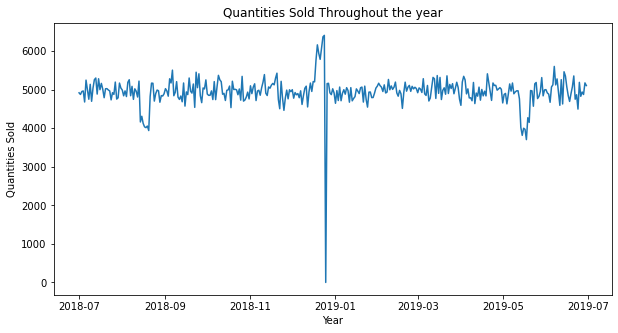

In [37]:
#Year = alltrans['Date'].unique()
plt.figure(figsize = (10, 5))
plt.plot(alltrans)
plt.title('Quantities Sold Throughout the year')
plt.ylabel('Quantities Sold')
plt.xlabel('Year')

plt.show()


Sales has been quite stable throughout the year and hits its peak in Jan 2019.

A slight dip was however experienced in certain periods

In [38]:
trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150g


In [39]:
SalesSize= pd.DataFrame(trans.groupby("DATE")['TOT_SALES'].agg(['sum',"count"]).sort_values('sum', ascending= False)).reset_index()
SalesSize.rename(columns = {'sum': 'Total_Sales', 'count': 'Total_Quantity'}, inplace = True)
SalesSize.head()

,DATE,Total_Sales,Total_Quantity
0,2018-12-24,6410.9,865
1,2018-12-23,6372.1,853
2,2018-12-19,6164.7,839
3,2018-12-22,6079.8,840
4,2018-12-20,5942.8,808


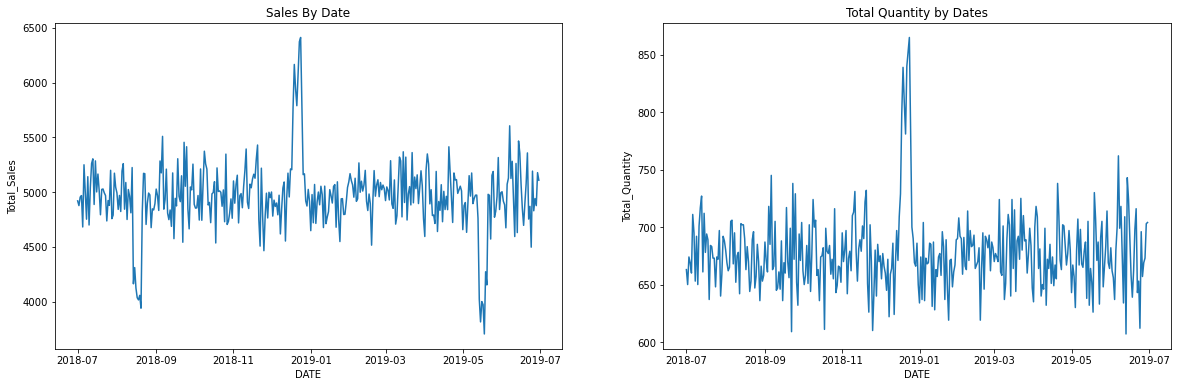

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1=plt.subplot(121)
sns.lineplot(x= 'DATE', y='Total_Sales', data=SalesSize)
plt.title('Sales By Date')

ax2=plt.subplot(122) 
sns.lineplot( x= 'DATE', y='Total_Quantity', data=SalesSize)
plt.title('Total Quantity by Dates')

plt.show()

From the above, it appears if we want to improve our sales, we should be enact strategy to drive volume as we cans ee that in moost month, the higher the volume, the higher the sales we make.

In [297]:
#transdate = trans.groupby('DATE').agg({'TOT_SALES': 'sum'}).reset_index() #Create a date dataframe
DecTrans = trans[trans['DATE'].isin(pd.date_range(start="2018-12-01",end="2018-12-31").tolist())]
DecTrans
#or
#DecTrans2 = alltrans[(alltrans.index < "2019-01-01") & (alltrans.index > "2018-11-30")]
#DecTrans2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
224,2018-12-14,2,2256,866,55,Snbts Whlgrn Crisps Cheddr Mstrd,1,1.7,90g
232,2018-12-17,2,2454,1071,34,Pringles Slt Vingar,1,3.7,134g
265,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme,2,13.0,380g
284,2018-12-02,4,4371,4315,108,Kettle Tortilla ChpsHny Jlpno Chili,2,9.2,150g
285,2018-12-24,4,4371,4316,78,Thins Chips Salt Vinegar,2,6.6,175g
...,...,...,...,...,...,...,...,...,...
264751,2018-12-20,268,268315,264753,55,Snbts Whlgrn Crisps Cheddr Mstrd,1,1.7,90g
264775,2018-12-01,269,269204,266270,58,Red Rock Deli Chikn Garlic Aioli,2,5.4,150g
264788,2018-12-18,270,270002,266609,26,Pringles Sweet Spcy BBQ,2,7.4,134g
264812,2018-12-16,271,271051,268509,62,Pringles Mystery Flavour,2,7.4,134g


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
sns.lineplot(x="Date", y="TOT_SALES", data=alltrans, ax=ax1)
plt.ylabel('Total Sales')
plt.title('One Year Sales')


ax2=plt.subplot(122)
ax2.bar(DecTrans.index, DecTrans['TOT_SALES'],color='#2ca02c')
ax2.set_xticks(DecTrans.index)

ax2.tick_params(axis='x', rotation=90) 
plt.ylabel('Total Sales')
plt.title('December Sales')
plt.show()


### Quantity Sold by Product Size

In [349]:
SalesbySize2 = pd.DataFrame(trans.groupby('PROD_SIZE')['PROD_SIZE'].agg({'count'}))
SalesbySize2.sort_values(ascending=False, by='count').head(2)

,count
PROD_SIZE,
175g,66390
150g,40203


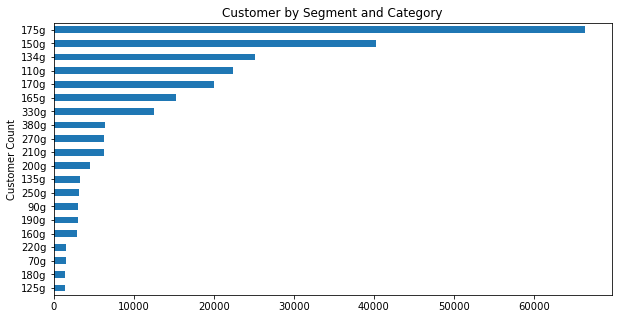

In [398]:
SalesbySize2["count"].sort_values().plot.barh(figsize=(10,5))
plt.title('Customer by Segment and Category')
plt.ylabel('Segment and Category')
plt.ylabel('Customer Count')
plt.show()

### Extract and align product names


In [43]:
trans['BRAND'] = trans['PROD_NAME'].str.split(' ').str[0]
#transactionData['BRAND'] = part[0]
trans.head(20)
trans['BRAND'].unique()
#trans.groupby('BRAND').agg({'BRAND': 'count'})

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [44]:
#use same name for same product with similar product
trans['BRAND'].replace('Ncc', 'Natural', inplace = True)
trans['BRAND'].replace('Ccs', 'CCS', inplace = True)
trans['BRAND'].replace('Smith', 'Smiths', inplace = True)
trans['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
trans['BRAND'].replace('Dorito', 'Doritos', inplace = True)
trans['BRAND'].replace('Ww', 'Woolworths', inplace = True)
trans['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
trans['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
trans['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

[]

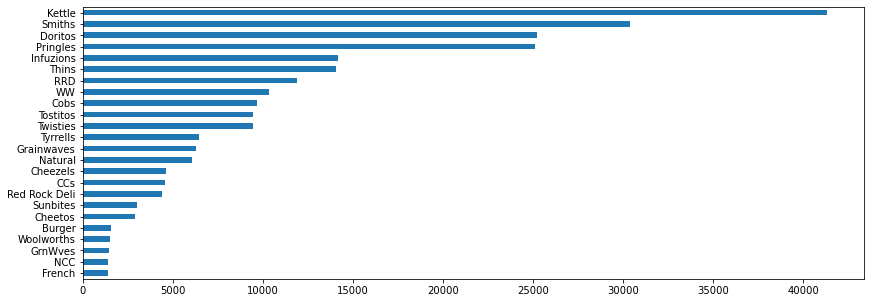

In [322]:
trans["BRAND"].value_counts(ascending=True).plot.barh(figsize=(14,5))
plt.plot()

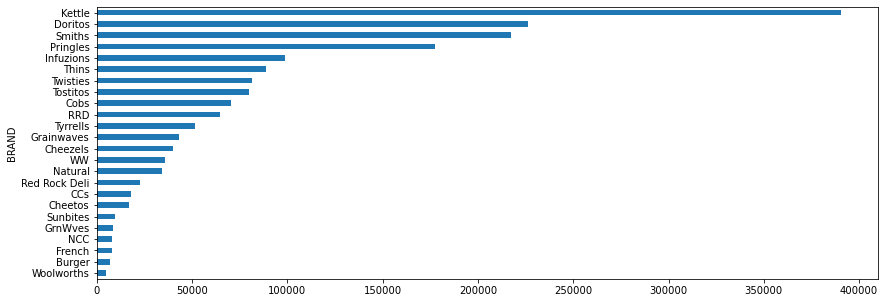

In [308]:
trans.groupby(["BRAND"])['TOT_SALES'].sum().sort_values(ascending = True).plot.barh(figsize=(14,5))
plt.show()

The top 5 most purchased chips generated the most revenue. Although, doritos generated more money than smith even though it has less sales volume.


### Customer Data

In [119]:
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [120]:
#Number of LIFESTAGE
cust.LIFESTAGE.nunique()

7

In [121]:
cust['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [122]:
cust['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [123]:
#Count Customers by LIFESTAGE and PREMIUM_CUSTOMER
cinfo = cust.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', 
                        aggfunc=len, fill_value=0)
cinfo

LYLTY_CARD_NBR                   
PREMIUM_CUSTOMER               Budget Mainstream Premium
LIFESTAGE                                               
MIDAGE SINGLES/COUPLES           1504       3340    2431
NEW FAMILIES                     1112        849     588
OLDER FAMILIES                   4675       2831    2273
OLDER SINGLES/COUPLES            4929       4930    4750
RETIREES                         4454       6479    3872
YOUNG FAMILIES                   4017       2728    2433
YOUNG SINGLES/COUPLES            3779       8088    2574

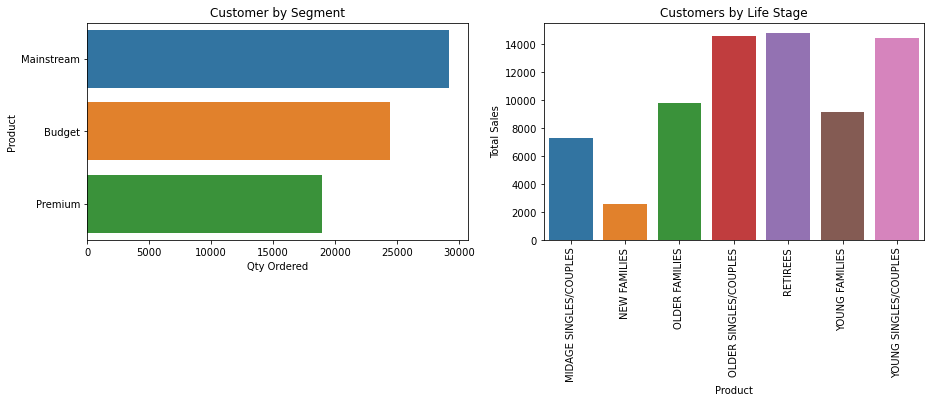

In [399]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
sns.countplot(y=cust['PREMIUM_CUSTOMER'], order = cust['PREMIUM_CUSTOMER'].value_counts().index)
ax1.set_ylabel('Product')
ax1.set_xlabel('Qty Ordered')
plt.title('Customer by Segment')


ax2=plt.subplot(122)
sns.countplot(cust['LIFESTAGE'], order =cust.groupby('LIFESTAGE').count().index)
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('Total Sales')
ax2.set_xlabel('Product')
plt.title('Customers by Life Stage')
plt.show()

By Segment, We have more mainstream customers and by Lifestage, more older singles/couples, retirees and young singles and couples

### Combine Transaction and Customer Data

In [129]:
fulldata = pd.merge(trans, cust, how= 'left', on = 'LYLTY_CARD_NBR')
fulldata.shape

(246740, 12)

In [130]:
fulldata.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [270]:
fulldata.shape

(246740, 12)

Lets Quickly look at how the brand is doing

====== YOUNG SINGLES/COUPLES - Premium =====
Kettle      838
Smiths      787
Pringles    537
Name: BRAND, dtype: int64


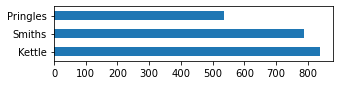

====== YOUNG SINGLES/COUPLES - Budget =====
Kettle      1211
Smiths      1185
Pringles     832
Name: BRAND, dtype: int64


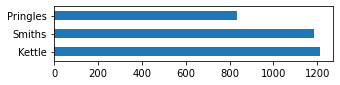

====== YOUNG SINGLES/COUPLES - Mainstream =====
Kettle      3844
Doritos     2379
Pringles    2315
Name: BRAND, dtype: int64


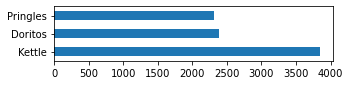

====== MIDAGE SINGLES/COUPLES - Premium =====
Kettle      1206
Smiths       923
Pringles     781
Name: BRAND, dtype: int64


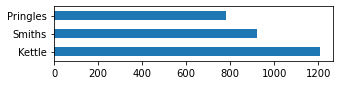

====== MIDAGE SINGLES/COUPLES - Budget =====
Kettle     713
Smiths     591
Doritos    479
Name: BRAND, dtype: int64


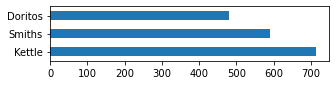

====== MIDAGE SINGLES/COUPLES - Mainstream =====
Kettle     2136
Smiths     1276
Doritos    1210
Name: BRAND, dtype: int64


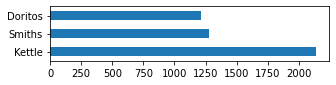

====== NEW FAMILIES - Premium =====
Kettle      247
Pringles    165
Smiths      155
Name: BRAND, dtype: int64


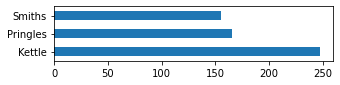

====== NEW FAMILIES - Budget =====
Kettle     510
Smiths     328
Doritos    315
Name: BRAND, dtype: int64


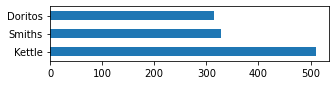

====== NEW FAMILIES - Mainstream =====
Kettle     414
Doritos    257
Smiths     244
Name: BRAND, dtype: int64


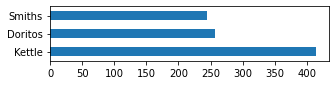

====== OLDER FAMILIES - Premium =====
Kettle      1512
Smiths      1448
Pringles    1014
Name: BRAND, dtype: int64


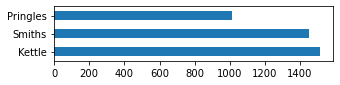

====== OLDER FAMILIES - Budget =====
Kettle     3320
Smiths     2948
Doritos    2032
Name: BRAND, dtype: int64


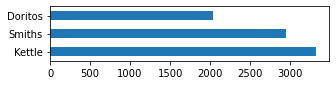

====== OLDER FAMILIES - Mainstream =====
Kettle     2019
Smiths     1742
Doritos    1263
Name: BRAND, dtype: int64


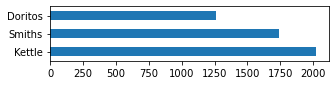

====== OLDER SINGLES/COUPLES - Premium =====
Kettle     2947
Smiths     1952
Doritos    1784
Name: BRAND, dtype: int64


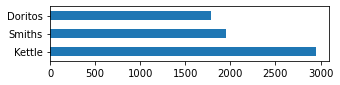

====== OLDER SINGLES/COUPLES - Budget =====
Kettle      3065
Smiths      2010
Pringles    1843
Name: BRAND, dtype: int64


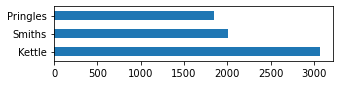

====== OLDER SINGLES/COUPLES - Mainstream =====
Kettle     2835
Smiths     2070
Doritos    1791
Name: BRAND, dtype: int64


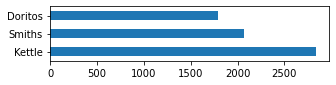

====== RETIREES - Premium =====
Kettle      2216
Smiths      1395
Pringles    1331
Name: BRAND, dtype: int64


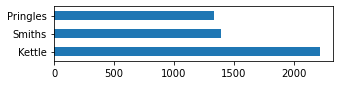

====== RETIREES - Budget =====
Kettle     2592
Smiths     1612
Doritos    1592
Name: BRAND, dtype: int64


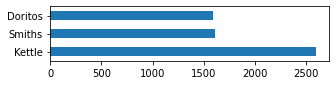

====== RETIREES - Mainstream =====
Kettle      3386
Smiths      2367
Pringles    2103
Name: BRAND, dtype: int64


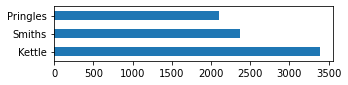

====== YOUNG FAMILIES - Premium =====
Kettle      1745
Smiths      1384
Pringles    1007
Name: BRAND, dtype: int64


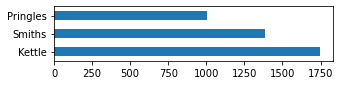

====== YOUNG FAMILIES - Budget =====
Kettle     2743
Smiths     2334
Doritos    1767
Name: BRAND, dtype: int64


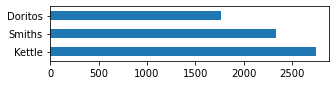

====== YOUNG FAMILIES - Mainstream =====
Kettle      1789
Smiths      1681
Pringles    1148
Name: BRAND, dtype: int64


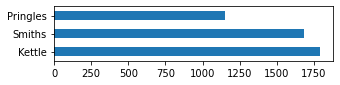

In [295]:
for stage in fulldata["LIFESTAGE"].unique():
    for prem in fulldata["PREMIUM_CUSTOMER"].unique():
        print('======',stage, '-', prem,'=====')
        summary = fulldata[(fulldata["LIFESTAGE"] == stage) & (fulldata["PREMIUM_CUSTOMER"] == prem)]["BRAND"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

By a mile, kettle is by far the most popular brand across all segment and customer category followed bt Doritos, smith and a far 4th Pringles

In [277]:
SalesbySegment = pd.DataFrame(fulldata.groupby(['PREMIUM_CUSTOMER']).TOT_SALES.sum())
SalesbySegment.rename(columns = {'TOT_SALES': 'Total_Sales'}, inplace = True)
SalesbySegment

,Total_Sales
PREMIUM_CUSTOMER,
Budget,631406.85
Mainstream,700865.40
Premium,472905.45


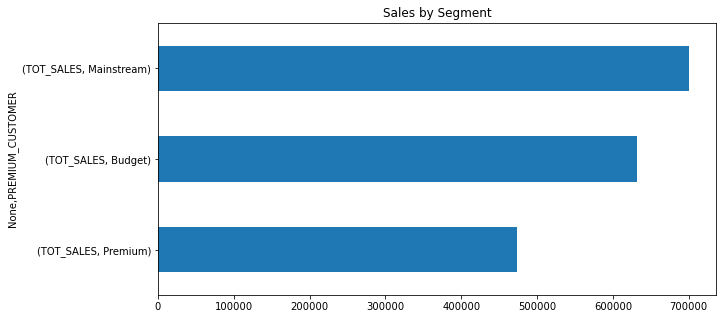

In [403]:
SalesbySegment = pd.DataFrame(fulldata.groupby(['PREMIUM_CUSTOMER']).TOT_SALES.sum().sort_values())
SalesbySegment.unstack().plot(kind = 'barh', figsize= (10, 5,), title = "Sales by Segment")
plt.show()

In [289]:
Salesbylifestage= pd.DataFrame(fulldata.groupby(['LIFESTAGE']).TOT_SALES.sum())
Salesbylifestage.rename(columns = {'TOT_SALES': 'Total_Sales'}, inplace = True)
Salesbylifestage.head()


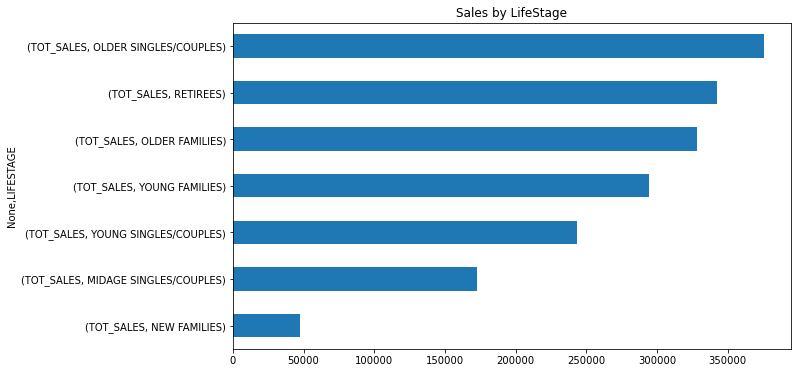

In [290]:
Salesbylifestage= pd.DataFrame(fulldata.groupby(['LIFESTAGE']).TOT_SALES.sum().sort_values())
Salesbylifestage.unstack().plot(kind= 'barh', figsize=(10,6), title ='Sales by LifeStage')
plt.show()

In [286]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE

Sales = pd.DataFrame(fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
Sales.rename(columns = {'TOT_SALES': 'Total_Sales'}, inplace = True)
Sales.sort_values(by = 'Total_Sales', ascending = False, inplace = True)
Sales.head()

Total_Sales
PREMIUM_CUSTOMER LIFESTAGE                         
Budget           OLDER FAMILIES           156863.75
Mainstream       YOUNG SINGLES/COUPLES    147582.20
                 RETIREES                 145168.95
Budget           YOUNG FAMILIES           129717.95
                 OLDER SINGLES/COUPLES    127833.60

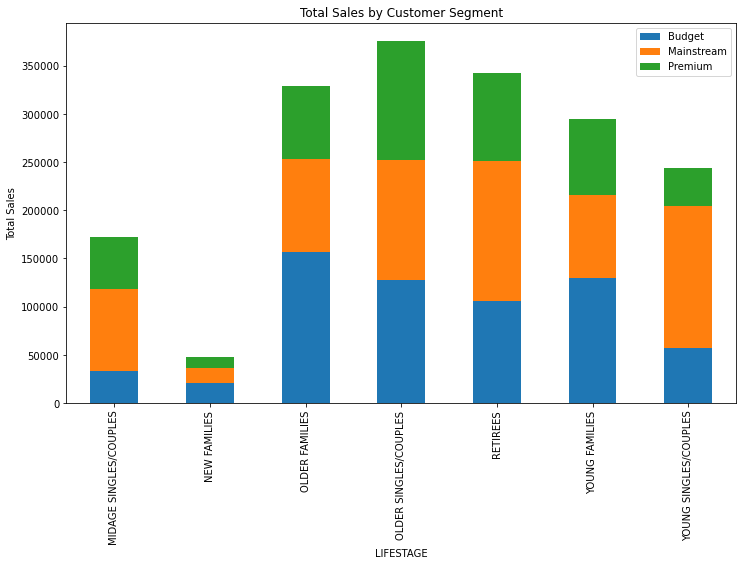

In [185]:
sales_plot = pd.DataFrame(fulldata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
sales_plot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 0)
plt.show()


We cans see a full break down of our sales based on customers lifestage and segment. Older families(budget) spend more on products followed by young singles(Maistream) and retirees (budget).

we would investigate further to see if this is because the segment has more customers or because they just spend more


In [184]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE
customers_plot = pd.DataFrame(fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers_plot.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers_plot.sort_values(by = 'Number of Customers', ascending = False).head(2)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 7917
                 RETIREES                              6358

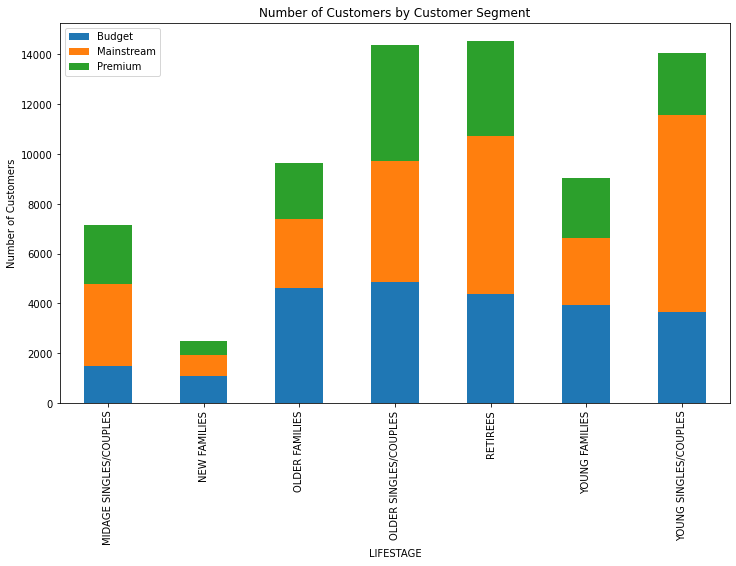

In [203]:
customers_plot = pd.DataFrame(fulldata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customers_plot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 0)
plt.show()


Retirees has the most number of customer, no surprise they are one of the most profitable segment, same applies to Older singles. However, the customer base of young singles and couples is not propotionate to the revenue they generate. 

That  segment's customer base needs to be harnessed and converted to revenue. In contrast, older families despite their small customer base, has a higher revenue return. we would investigate further on this

Breaking it down further to see our most profitable set of customers 

In [173]:
salesbrkdown = pd.DataFrame(fulldata.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
salesbrkdown.sort_values(ascending=False, by='sum').head(2)

,,sum,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
OLDER FAMILIES,Budget,156863.75,7.291241
YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279


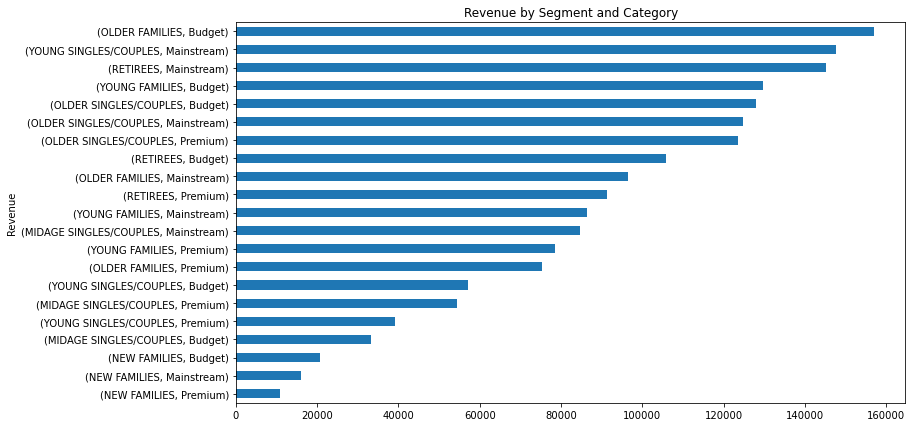

In [404]:
salesbrkdown["sum"].sort_values().plot.barh(figsize=(12,7))
plt.title('Revenue by Segment and Category')
plt.ylabel('Segment and Category')
plt.ylabel('Revenue')
plt.show()

In [174]:
Customerbrkdown = pd.DataFrame(fulldata.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["count"]))
Customerbrkdown.sort_values(ascending=False, by='count').head(2)

,,count
LIFESTAGE,PREMIUM_CUSTOMER,
OLDER FAMILIES,Budget,21514
RETIREES,Mainstream,19970


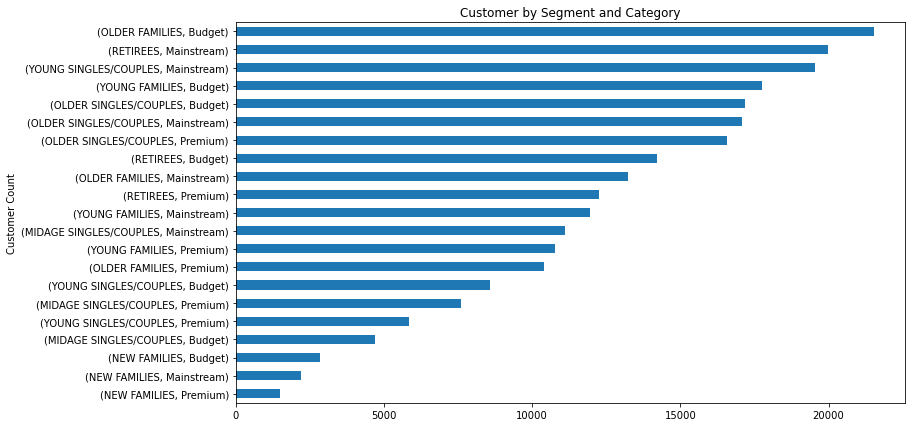

In [405]:
Customerbrkdown["count"].sort_values().plot.barh(figsize=(12,7))
plt.title('Customer by Segment and Category')
plt.ylabel('Segment and Category')
plt.ylabel('Customer Count')
plt.show()

On the average, we can say that young/single couples mainstream are our most profitable customers, puting the number of their customers and revenue they generate

In [406]:
##To see the customer segenemt that spend the most, us check the average revenue generated by customer segment

Average_revenue = fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
Average_revenue = pd.DataFrame(Average_revenue, columns = {'Average Revenue per Customer'})
Average_revenue.sort_values(by = 'Average Revenue per Customer', ascending = False).head(4)

,,Average Revenue per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,34.581618
Budget,OLDER FAMILIES,34.019464
Premium,OLDER FAMILIES,33.725952
Budget,YOUNG FAMILIES,32.815065


Lets check the averages

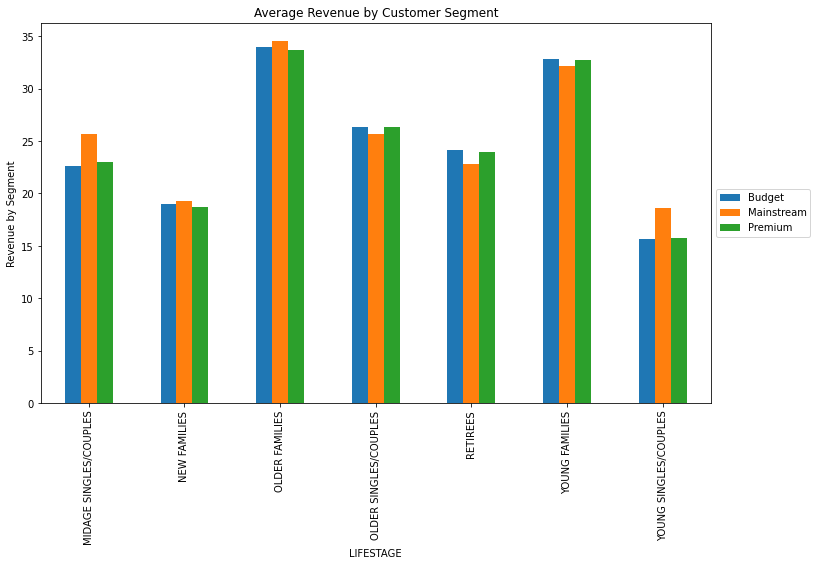

In [407]:
Average_revenue = fulldata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum() / fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
Average_revenue.unstack().plot(kind = 'bar',  figsize = (12, 7), title = 'Average Revenue by Customer Segment')
plt.ylabel('Revenue by Segment')
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

Older Families spend more money on the average, especially their mainstream customers.

Also, mainstream customers generates slighly more revenue than other segments, in 4 of the 7 lifestage category 

In [248]:
Average_Unit = fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
Average_Unit = pd.DataFrame(Average_Unit, columns = {'Average Unit per Customer'})
Average_Unit.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


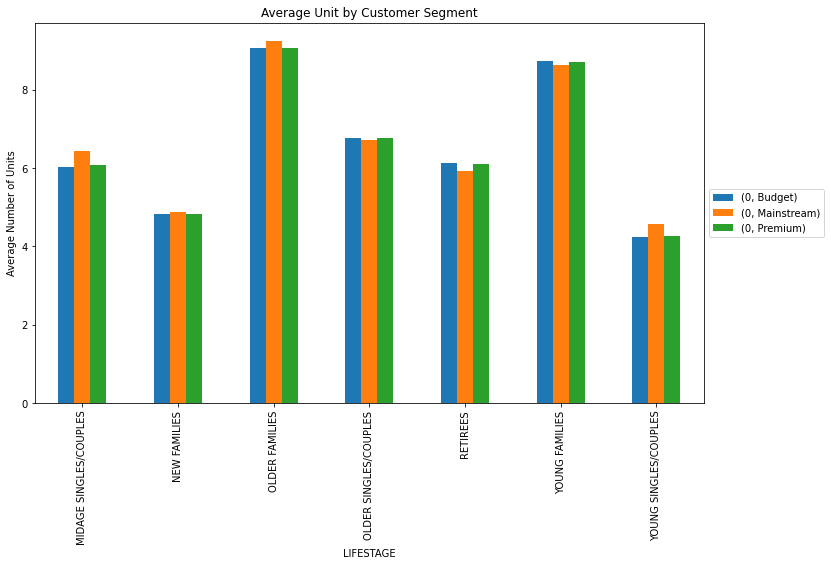

In [299]:
Average_UnitPlot = pd.DataFrame(fulldata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / fulldata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
Average_UnitPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
#plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

Again, mainsteams customers buys more units in a 4 of the 7 category, then budget, premium buyers have the fewest unit purchased

It is safe to conclude that its a unit/volunm driven market, if volunme can be driven and achieved, more money would be generated

In [408]:
#Checking the segments relativity to prices 

# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE
Average_Price = fulldata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.agg(["mean"])
Average_Price.rename(columns = ({'mean':'Price_per_Unit'}), inplace = True)
Average_Price.sort_values(by = 'Price_per_Unit', ascending = False)

Price_per_Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       MIDAGE SINGLES/COUPLES        7.637156
                 YOUNG SINGLES/COUPLES         7.551279
Premium          RETIREES                      7.461315
                 OLDER SINGLES/COUPLES         7.459997
Budget           RETIREES                      7.445786
                 OLDER SINGLES/COUPLES         7.444305
Mainstream       NEW FAMILIES                  7.313364
                 OLDER SINGLES/COUPLES         7.306049
Budget           YOUNG FAMILIES                7.302705
                 NEW FAMILIES                  7.297256
                 OLDER FAMILIES                7.291241
Premium          YOUNG FAMILIES                7.285951
Mainstream       OLDER FAMILIES                7.281440
                 RETIREES                      7.269352
Premium          OLDER FAMILIES                7.232779
                 NEW FAMILIES                  7.231720
Mainstream       YOUNG FAMILIES                7.226772
Premium          MIDAGE SINGLES/COUPLES        7.152371
Budget           MIDAGE SINGLES/COUPLES        7.108442
Premium          YOUNG SINGLES/COUPLES         6.673325
Budget           YOUNG SINGLES/COUPLES         6.663023

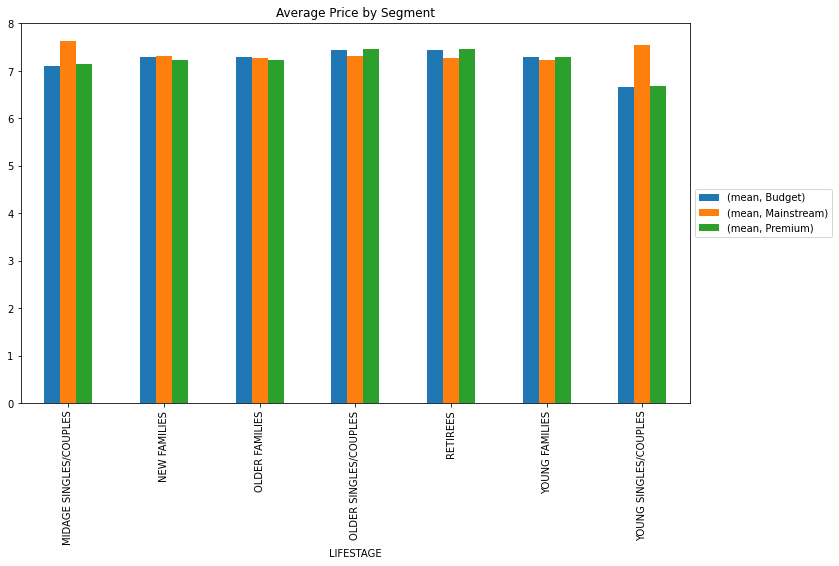

In [409]:
Average_Price_plot = Average_Price = fulldata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.agg(["mean"])
Average_Price_plot.unstack().plot(kind = 'bar', figsize = (12, 7), title ='Average Price by Segment')

plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

The average price per product is close among all categories of customer, but higher for main stream when compared to other categories

Noteworthy is that depiste the small number of purchases, new family has one of the highest price per purchase, that points to the direction that they dont neccesserily buy cheaper products



 Midage and Young "Singles/Couples" have the highest average spend. Despite the triviality (7.6 vs 6.6) in the difference between the  Mainstream and Non-Mainstream, we will still go ahead to examine the statistics difference 
 


Testing varaibles

In [395]:
#Grouping into mainstream and NonMainstream
mainstream = fulldata[(fulldata['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (fulldata['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (fulldata['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') )]
nonMainstream = fulldata[(fulldata['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (fulldata['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (fulldata['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES'))]
mainstream=mainstream['TOT_SALES']
nonMainstream = nonMainstream['TOT_SALES']


In [394]:
stat, pval = ttest_ind(mainstream, nonMainstream, equal_var=False)
print(pval)
pval < 0.0000001

1.834645908180742e-237


True


P-Value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.

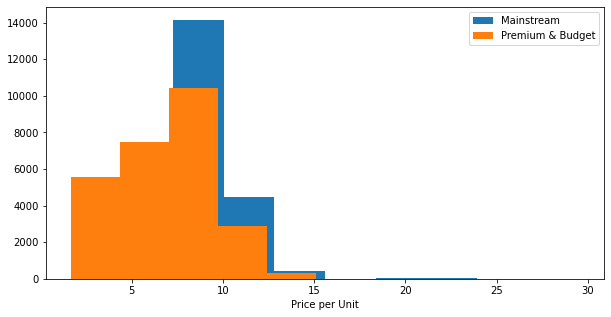

In [397]:
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')
plt.show()

----------------------




### Findings


The top three category with regards to sales are:
Older families (Budget)
Young Singles/Couples Mainstream)
Retirees (Mainstream) 

They are also the top three in terms of customer numbers, only that Retirees (Mainstream) has slightly more customers than
Young Singles/Couples Mainstream)

Older families (budget) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
Older Families followed by Young Families has the highest average quantity of chips bought per purchase.

Average price paid for a product is relatively the same, even with new families who appears buy the fewest chips. This is understandable as chips are not expensive products

The three most purchased brands are Kettle, Doritos and Smith 

All category of customers first choice's product is kettle, followed by smith, except for "Young and Midage Singles/Couples" who prefers Doritos

Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.




----

### Recommendations

First and foremost, focus on volume driven sales strategy, because the higher the number of customers, the higher the revenue.

Secondly, create promotions for Young Singles to buy more Smith chips, and they are the only segment who buys Doritos more than smith chips, this shows that there is an opportunity to scale up on Doritos in that segment.

Consider making smaller chip sizes attractive, especially if they have higher profit margin than the larger packs. 

Increase marketing promotions for other brands that has mid-level patronage such as Grainwaves, RRD, WW, Cobs, and Tostitos to name a few so that they can compete favorably with the top brands


